In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
loan_data = pd.read_csv('accepted_2007_to_2018Q4_Copy.csv')
loan_data.shape

/Users/jjobes/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(29999, 151)

Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types

In [3]:
# find missing values for each column


missing = pd.concat([loan_data.isnull().sum(), 100 * loan_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')


,count,%
id,0,0.0
pct_tl_nvr_dlq,0,0.0
tot_cur_bal,0,0.0
tot_coll_amt,0,0.0
acc_now_delinq,0,0.0
...,...,...
sec_app_open_acc,29999,100.0
sec_app_mort_acc,29999,100.0
sec_app_inq_last_6mths,29999,100.0
sec_app_fico_range_high,29999,100.0


In [4]:
# define list of columns with a large amount of missing values

large_null_columns = missing[missing['%'] > 0.99] 
large_null_columns.reset_index(inplace=True)
large_null_columns.columns

columns_to_drop = list(large_null_columns['index'])
print(columns_to_drop)

['member_id', 'emp_title', 'emp_length', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'bc_util', 'mo_sin_old_il_acct', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_tl_120dpd_2m', 'percent_bc_gt_75', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'ha

In [5]:
# drop these columns

new_data = loan_data.drop(columns_to_drop, axis=1)
new_data.shape

(29999, 86)

Start looking at each column and getting it into a numerical format I can start analyzing

In [6]:
new_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,...,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600,3600,3600,36 months,13.99,123.03,C,C4,MORTGAGE,...,76.9,0,0,178050,7746,2400,13734,N,Cash,N
1,68355089,24700,24700,24700,36 months,11.99,820.28,C,C1,MORTGAGE,...,97.4,0,0,314017,39475,79300,24667,N,Cash,N
2,68341763,20000,20000,20000,60 months,10.78,432.66,B,B4,MORTGAGE,...,100.0,0,0,218418,18696,6200,14877,N,Cash,N
3,66310712,35000,35000,35000,60 months,14.85,829.90,C,C5,MORTGAGE,...,100.0,0,0,381215,52226,62500,18000,N,Cash,N
4,68476807,10400,10400,10400,60 months,22.45,289.91,F,F1,MORTGAGE,...,96.6,0,0,439570,95768,20300,88097,N,Cash,N


In [7]:
# all rows have loan amounts. loan amounts range from $35,000 to $1,000.
# nothing more to investigate on this column

new_data['loan_amnt'].describe()

count    29999.000000
mean     15000.318344
std       8709.659995
min       1000.000000
25%       8000.000000
50%      13950.000000
75%      20000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [8]:
# all loan amounts = funded amount. No need to have duplicate data so drop funded amount and the c. 
# funded_amount_inv doesnt always equal loan_amount so I will leave this column

#new_data['funded_amnt'].describe()

#new_data['diff_loan_funded'] = new_data['loan_amnt'] - new_data['funded_amnt']
#new_data['diff_loan_funded'].describe()

new_data.drop(columns=['funded_amnt'], axis=1, inplace=True)

In [9]:
new_data.shape

(29999, 85)

In [10]:
new_data.head()

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600,3600,36 months,13.99,123.03,C,C4,MORTGAGE,55000.0,...,76.9,0,0,178050,7746,2400,13734,N,Cash,N
1,68355089,24700,24700,36 months,11.99,820.28,C,C1,MORTGAGE,65000.0,...,97.4,0,0,314017,39475,79300,24667,N,Cash,N
2,68341763,20000,20000,60 months,10.78,432.66,B,B4,MORTGAGE,63000.0,...,100.0,0,0,218418,18696,6200,14877,N,Cash,N
3,66310712,35000,35000,60 months,14.85,829.90,C,C5,MORTGAGE,110000.0,...,100.0,0,0,381215,52226,62500,18000,N,Cash,N
4,68476807,10400,10400,60 months,22.45,289.91,F,F1,MORTGAGE,104433.0,...,96.6,0,0,439570,95768,20300,88097,N,Cash,N


In [11]:
new_data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [12]:
new_data['term'].value_counts()

 36 months    20662
 60 months     9337
Name: term, dtype: int64

In [13]:
# most of the loans are 36 month term loans
# remove white space and 'months' in values

new_data['term'] = new_data.term.str.replace('months,?' , '')

new_data['term'].str.strip()

0        36
1        36
2        60
3        60
4        60
         ..
29994    36
29995    36
29996    36
29997    36
29998    36
Name: term, Length: 29999, dtype: object

In [14]:
new_data.head()

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600,3600,36,13.99,123.03,C,C4,MORTGAGE,55000.0,...,76.9,0,0,178050,7746,2400,13734,N,Cash,N
1,68355089,24700,24700,36,11.99,820.28,C,C1,MORTGAGE,65000.0,...,97.4,0,0,314017,39475,79300,24667,N,Cash,N
2,68341763,20000,20000,60,10.78,432.66,B,B4,MORTGAGE,63000.0,...,100.0,0,0,218418,18696,6200,14877,N,Cash,N
3,66310712,35000,35000,60,14.85,829.90,C,C5,MORTGAGE,110000.0,...,100.0,0,0,381215,52226,62500,18000,N,Cash,N
4,68476807,10400,10400,60,22.45,289.91,F,F1,MORTGAGE,104433.0,...,96.6,0,0,439570,95768,20300,88097,N,Cash,N


In [15]:
# I know from counting null values that the first 30 columns have no missing values as shown below
# I am going to scan through the first 30 columns to see if they are usable for later analysis. If not, drop them. 
# Also, get value counts on each column to understand the dataset better


new_data.columns.get_loc('initial_list_status')

30

In [16]:
new_data['home_ownership'].value_counts()

MORTGAGE    14659
RENT        11846
OWN          3493
ANY             1
Name: home_ownership, dtype: int64

In [17]:
# looks like Source verified (source of income verified) and verified (only income verification) mean different things. I'll leave them alone. 

new_data['verification_status'].value_counts()

Source Verified    12094
Verified            9189
Not Verified        8716
Name: verification_status, dtype: int64

In [18]:
# of the finalized loans only about 77% are paid off on time

new_data['loan_status'].value_counts()

Fully Paid            21085
Charged Off            5413
Current                3256
Late (31-120 days)      154
In Grace Period          72
Late (16-30 days)        19
Name: loan_status, dtype: int64

In [20]:
new_data['pymnt_plan'].value_counts()

n    29996
y        3
Name: pymnt_plan, dtype: int64

In [21]:
# the url doesnt help out analysis. Dropped. 

new_data.drop(columns=['url'], axis=1, inplace=True)

In [22]:
new_data.shape

(29999, 84)

In [23]:
# looks like purpose and title are the same thing. Lets see if they are

print(new_data['purpose'].isnull().sum())
print(new_data['title'].isnull().sum())

# purpose looks like the main catagory with no missing values
# are any contradictory? Need to investigate

0
132


In [24]:
purpose_labels = list(new_data['purpose'].value_counts().index)

purpose_labels

['debt_consolidation',
 'credit_card',
 'home_improvement',
 'other',
 'major_purchase',
 'medical',
 'small_business',
 'car',
 'vacation',
 'moving',
 'house',
 'renewable_energy']

In [25]:
title_labels = list(new_data['title'].value_counts().index)

title_labels

['Debt consolidation',
 'Credit card refinancing',
 'Home improvement',
 'Other',
 'Major purchase',
 'Medical expenses',
 'Business',
 'Car financing',
 'Vacation',
 'Moving and relocation',
 'Home buying',
 'Green loan']

In [26]:
new_data['purpose'][0]

'debt_consolidation'

In [27]:
new_data['title'][0]

'Debt consolidation'

In [28]:
# review with Tony
# filter new_data into each purpose catorgy then right for loop to confirm purpose matches title? seems like there is a better way

#for i in len(new_data):
#    if new_data['purpose'][0] == 'debt_consolidation' and new_data['title'][0] == 'Debt consolidation':
#    return True
    

In [29]:
new_data.head()

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600,3600,36,13.99,123.03,C,C4,MORTGAGE,55000.0,...,76.9,0,0,178050,7746,2400,13734,N,Cash,N
1,68355089,24700,24700,36,11.99,820.28,C,C1,MORTGAGE,65000.0,...,97.4,0,0,314017,39475,79300,24667,N,Cash,N
2,68341763,20000,20000,60,10.78,432.66,B,B4,MORTGAGE,63000.0,...,100.0,0,0,218418,18696,6200,14877,N,Cash,N
3,66310712,35000,35000,60,14.85,829.90,C,C5,MORTGAGE,110000.0,...,100.0,0,0,381215,52226,62500,18000,N,Cash,N
4,68476807,10400,10400,60,22.45,289.91,F,F1,MORTGAGE,104433.0,...,96.6,0,0,439570,95768,20300,88097,N,Cash,N


In [30]:
# debt to income ratio
# there are some outliers here. Delete the row with 999

new_data['dti'].describe()

new_data.drop(new_data.index[new_data[new_data['dti'] == 999].index], inplace=True)

In [31]:
new_data.shape

(29998, 84)

In [32]:
new_data['dti'].describe()

count    29997.000000
mean        19.376179
std          8.855084
min          0.000000
25%         12.700000
50%         18.890000
75%         25.670000
max        137.400000
Name: dti, dtype: float64

In [33]:
dti_sorted = new_data['dti'].sort_values()
x = list(range(len(dti_sorted)))

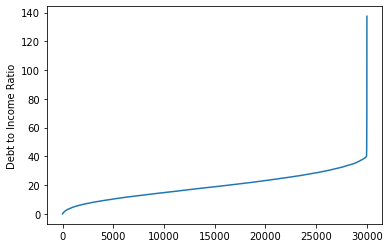

In [34]:
plt.plot(x,dti_sorted)
plt.xlabel('')
plt.ylabel('Debt to Income Ratio')
plt.show()

In [35]:
#Anthing over 50 looks to be outliers and more than likely a typo / not real. Drop rows from dataset.
over_45_df = new_data.loc[new_data['dti'] > 45]

In [36]:
print(over_45_df['dti'])

664       46.71
2706      51.20
3773      48.56
4526      83.64
5234      55.06
10023     83.40
10459     47.31
10548    137.40
10925     47.06
11879     89.83
13700    136.97
16964     52.80
17618     48.48
18656     46.92
19523     58.54
19803     59.18
19891     45.58
19902     46.67
20246     45.78
20867     59.26
22841    100.09
24340     68.41
25472     45.32
26167     52.45
27621     90.00
Name: dti, dtype: float64


In [43]:
df = new_data[new_data.dti < 45]

In [44]:
df.shape

(29972, 84)

In [45]:
df['dti'].describe()

count    29972.000000
mean        19.337402
std          8.722780
min          0.000000
25%         12.700000
50%         18.880000
75%         25.650000
max         44.860000
Name: dti, dtype: float64

In [46]:
small_dti_df = df[df['dti'] > 0.05]

In [47]:
# you cant have infinite debt/income. Remove from dataset. 

small_dti_df['dti'].describe()

count    29960.000000
mean        19.345145
std          8.715941
min          0.070000
25%         12.700000
50%         18.885000
75%         25.650000
max         44.860000
Name: dti, dtype: float64

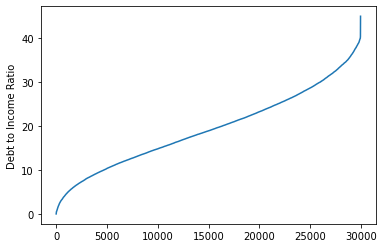

In [48]:
x = list(range(len(small_dti_df)))

plt.plot(x, sorted(small_dti_df['dti']))
plt.xlabel('')
plt.ylabel('Debt to Income Ratio')
plt.show()

In [49]:
small_dti_df.head()

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600,3600,36,13.99,123.03,C,C4,MORTGAGE,55000.0,...,76.9,0,0,178050,7746,2400,13734,N,Cash,N
1,68355089,24700,24700,36,11.99,820.28,C,C1,MORTGAGE,65000.0,...,97.4,0,0,314017,39475,79300,24667,N,Cash,N
2,68341763,20000,20000,60,10.78,432.66,B,B4,MORTGAGE,63000.0,...,100.0,0,0,218418,18696,6200,14877,N,Cash,N
3,66310712,35000,35000,60,14.85,829.90,C,C5,MORTGAGE,110000.0,...,100.0,0,0,381215,52226,62500,18000,N,Cash,N
4,68476807,10400,10400,60,22.45,289.91,F,F1,MORTGAGE,104433.0,...,96.6,0,0,439570,95768,20300,88097,N,Cash,N


In [50]:
small_dti_df.describe()

,id,loan_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,2.996000e+04,29960.000000,29960.000000,29960.000000,29960.000000,2.996000e+04,29960.000000,29960.000000,29960.000000,29960.000000,...,29960.000000,29960.000000,29960.000000,29960.000000,29960.000000,29960.000000,2.996000e+04,29960.000000,29960.000000,29960.000000
mean,6.726355e+07,14999.434246,14991.376836,12.237029,434.313695,7.880571e+04,19.345145,0.336983,694.861649,698.861816,...,0.003304,0.089519,2.256108,93.929993,0.134680,0.068825,1.780830e+05,53829.864219,22675.114753,45880.838318
std,1.942714e+06,8709.336762,8703.721935,4.207048,248.671425,8.240831e+04,8.715941,0.891224,31.181145,31.181951,...,0.058542,0.490774,1.909934,8.894526,0.382778,0.439545,1.749005e+05,49375.994805,22363.078182,44952.419272
min,3.617740e+05,1000.000000,950.000000,5.320000,30.540000,3.800000e+03,0.070000,0.000000,660.000000,664.000000,...,0.000000,0.000000,0.000000,12.500000,0.000000,0.000000,2.500000e+03,2.000000,0.000000,0.000000
25%,6.658287e+07,8000.000000,8000.000000,9.170000,255.030000,4.800000e+04,12.700000,0.000000,670.000000,674.000000,...,0.000000,0.000000,1.000000,90.900000,0.000000,0.000000,5.320675e+04,23421.750000,8000.000000,16946.500000
50%,6.736513e+07,13950.000000,13850.000000,11.990000,378.150000,6.700000e+04,18.885000,0.000000,690.000000,694.000000,...,0.000000,0.000000,2.000000,97.400000,0.000000,0.000000,1.165830e+05,41040.000000,15700.000000,35158.000000
75%,6.791957e+07,20000.000000,20000.000000,14.480000,574.397500,9.500000e+04,25.650000,0.000000,710.000000,714.000000,...,0.000000,0.000000,3.000000,100.000000,0.000000,0.000000,2.578760e+05,68276.250000,29600.000000,61630.250000
max,6.861706e+07,35000.000000,35000.000000,28.990000,1354.660000,8.700000e+06,44.860000,15.000000,845.000000,850.000000,...,2.000000,13.000000,30.000000,100.000000,8.000000,22.000000,2.885999e+06,878659.000000,303000.000000,657179.000000
